<a href="https://colab.research.google.com/github/irtengunica/YapayZekaDersleri/blob/main/5_Titanik_Projesi_kodlar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:05ebe713-4312-4581-a2a0-d69638d17912.png)

# Titanik Projesi
* RMS Titanic, White Star Line şirketine ait Olympic sınıfı bir transatlantik yolcu gemisiydi. Harland and Wolff tersanelerinde üretilmiştir.
    * Uzunluk: 269 m
    * Yapım başlangıç tarihi: 31 Mart 1909
    * Suya indirilme tarihi: 31 Mayıs 1911
    * Ağırlık: 52.310 ton
* ![image.png](attachment:7158b292-150a-41c8-817f-2a447b854422.png)
* Titaniğin batışı, tarihin en kötü şöhretli gemi kazalarından biridir. 15 Nisan 1912'de, yolculuğu sırasında Titanik bir buzdağına çarparak battı ve 2224 yolcu ve mürettebattan 1502'si öldü.
* ![image.png](attachment:5722939a-09fe-4b19-9be8-30df0041ad2d.png)
* Bu proje kapsamında, titanik verisini kullanarak şimdiye kadar öğrendiğimiz veri bilimi ve makine öğrenmesi yöntemlerinin tekrarını yapacağız ve öğrendiğimiz bilgileri pekiştireceğiz.
<br><br>**İçerik:**
1. [Veriyi İçe Aktar ve Kontrol Et](#1)
1. [Değişkenlerin Tanımları](#2)
    * [Tek Değişken Analizi](#3)
        * [Kategorik Değişken](#4)
        * [Sayısal Değişken](#5)
1. [Temel Veri Analizi](#6)
1. [Aykırı Değer Tespiti](#7)
1. [Kayıp Veri](#8)
    * [Kayıp Verinin Bulunması](#9)
    * [Kayıp Verinin Doldurulması](#10)
1. [Görselleştirme](#11)
    * [Kardeş/Eş -- Ebeveyn/Çocuk -- Yaş -- Ücret -- Hayatta Kalma Arasındaki Korelasyon](#12)
    * [Kardeş/Eş -- Hayatta Kalma](#13)
    * [Ebeveyn/Çocuk -- Hayatta Kalma](#14)
    * [Sınıf -- Hayatta Kalma](#15)
    * [Yaş -- Hayatta Kalma](#16)
    * [Sınıf -- Hayatta Kalma -- Yaş](#17)
    * [Liman -- Cinsiyet -- Sınıf -- Hayatta Kalma](#18)
    * [Liman -- Cinsiyet -- Ücret -- Hayatta Kalma](#19)
    * [Kayıp Veri Doldurulması: Yaş Değişkeni](#20)
1. [Özellik Mühendisliği](#21)
    * [İsim -- Ünvan](#22)
    * [Aile Boyutu](#23)
    * [Liman](#24)
    * [Bilet](#25)
    * [Sınıf](#26)
    * [Cinsiyet](#27)
    * [Yolcu Numarası ve Kabin Değişkenlerinin Çıkarılması](#28)
1. [Modelleme](#29)
    * [Eğitim - Test Bölünmesi](#30)
    * [Temel Lojistik Regresyon](#31)
    * [Hiperparametre Ayarı - Izgara Arama - Çapraz Doğrulama](#32)

* [Topluluk Modelleme](#33)

In [ ]:
# buraya kod yazacağız
# Titanik projesi boyunca kullanılacak olan tüm kütüphanelerin içe aktarılması
import numpy as np # matris ve lineer cebir
import pandas as pd # veri işleme

# Görselleştirme
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

from collections import Counter

import warnings # gereksiz uyarıları da kapatalım
warnings.filterwarnings("ignore")

# makine öğrenmesi için sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


<ipython-input-1-203c8332c574>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<a id = "1"></a><br>
## Veriyi İçe Aktar ve Kontrol Et
* Titanik verisi, "titanik.csv" dosyasının içinde bulunmaktadır.
* Şimdi bu dosyayı içe aktaralım

In [ ]:
#Dosyayı yüklemeyi unutmayın
from google.colab import files
uploaded = files.upload()

Saving titanik.csv to titanik.csv


In [ ]:
# buraya kod yazacağız
# pandas kütüphanesi ile veriyi okuyalım
egitim_df = pd.read_csv("titanik.csv")

In [ ]:
# buraya kod yazacağız
# eğitim verisi içerisinde bulunan özelliklere/sütunlara bakalım
egitim_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# buraya kod yazacağız
# sütunların ne anlama geldiklerine bir sonraki derste bakacağız; ancak fikir sahibi olalım
egitim_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# buraya kod yazacağız
# eğitim verisi ile ilgili temel istatistiksel çıktılara bakalım
egitim_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
## Değişkenlerin Tanımları
1. PassengerId: Her bir yolcunun eşsiz numarası
1. Survived: Yolcunun hayatta kalması (1) veya hayatta kalmaması (0)
1. Pclass: Yolcunun yolculuk ettiği sınıf
1. Name: Yolcunun ismi
1. Gender: Yolcunun cinsiyeti
1. Age: Yolcunun yaşı
1. SibSp: Yolcunun kardeş ve eş sayısı
1. Parch: Yolcunun ebeveyn ve çocuk sayısı
1. Ticket: Bilet numarası
1. Fare: Bilet ücreti
1. Cabin: Kabin kategorisi
1. Embarked: Yolcunun gemiye hangi limanda bindiği (C = Cherbourg, Q = Queenstown, S = Southampton)


In [ ]:
# buraya kod yazacağız
# veri içerisindeki değişkenlerin veri tiplerine, verinin içerisinde kayıp veri olup olmadığına hızlıca göz atalım
egitim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2 adet): Bilet ücreti ve yas
* int64(5 adet): Yolcunun yolculuk ettiği sınıf, kardeş ve eş sayısı, ebeveyn ve çocuk sayısı , her bir yolcunun eşsiz numarası ve yolcunun hayatta kalması ve ya hayatta kalmaması
* object(5 adet): Kabin kategorisi, yolcunun gemiye hangi limanda bindiği, bilet numarası, isim ve cinsiyet
* Şimdi burada bulunan değişken isimlerini değiştirerek Türkçe isimler verelim.

In [ ]:
# buraya kod yazacağız
# değişken isimlerinin değiştirilmesi
egitim_df.rename(columns={'PassengerId': 'id',
                     'Survived'   : 'hayatta_kalma',
                     'Pclass'     : 'sinif',
                     'Name'       : 'isim',
                     'Gender'     : 'cinsiyet',
                     'Age'        : 'yas',
                     'SibSp'      : 'kardes_es',
                     'Parch'      : 'ebeveyn_cocuk',
                     'Ticket'     : 'bilet',
                     'Fare'       : 'ucret',
                     'Cabin'      : 'kabin',
                     'Embarked'   : 'liman'}, inplace=True) # inplace = True dediğimiz zaman ismi değiştirilen veri otomatik olarak veri variable'a kaydedilir
egitim_df.head(2)

,id,hayatta_kalma,sinif,isim,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<a id = "3"></a><br>
### Tek Değişken Analizi
* Kategorik Değişken: hayatta_kalma, cinsiyet, sinif, liman, kabin, isim, bilet, kardes_es ve ebeveyn_cocuk
* Sayısal Değişken: ucret, yas ve id

<a id = "4"></a><br>
#### Kategorik Değişken

In [ ]:
def cubukGrafigi(degisken):
    """
        girdi: değişken örn: "cinsiyet"
        çıktı: çubuk grafiği, eşsiz değer sayısı
    """
    # değişkeni alalım
    ozellik = egitim_df[degisken]

    # kategorik değişkenin sayısını hesaplayalım
    ozellik_degeri = ozellik.value_counts()

    # gorsellestir
    plt.figure(figsize = (9,3))
    plt.bar(ozellik_degeri.index, ozellik_degeri)
    plt.xticks(ozellik_degeri.index, ozellik_degeri.index.values)
    plt.ylabel("Frekans")
    plt.title(degisken)
    plt.show()
    print("{}: \n {}".format(degisken,ozellik_degeri))


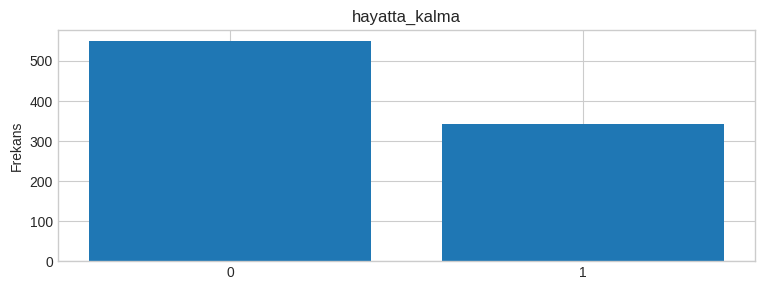

hayatta_kalma: 
 hayatta_kalma
0    549
1    342
Name: count, dtype: int64


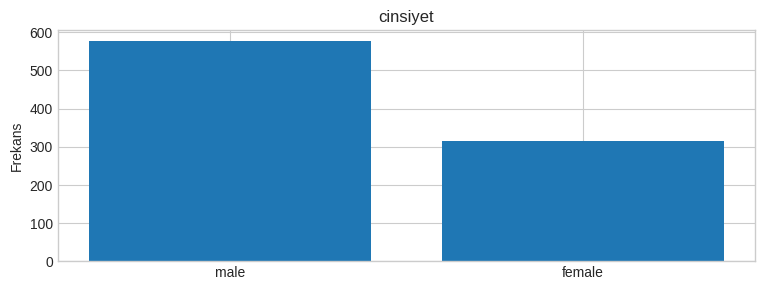

cinsiyet: 
 cinsiyet
male      577
female    314
Name: count, dtype: int64


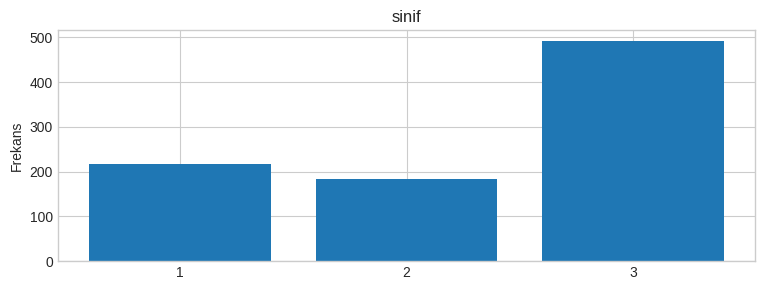

sinif: 
 sinif
3    491
1    216
2    184
Name: count, dtype: int64


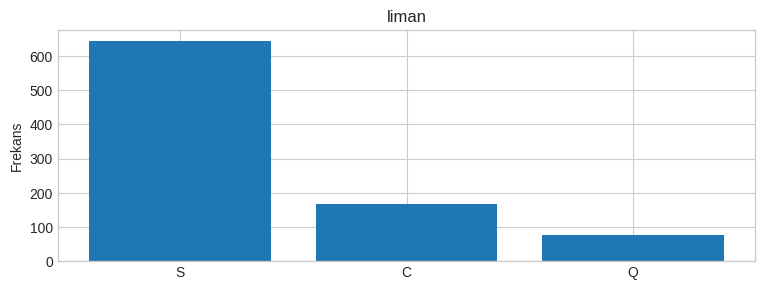

liman: 
 liman
S    644
C    168
Q     77
Name: count, dtype: int64


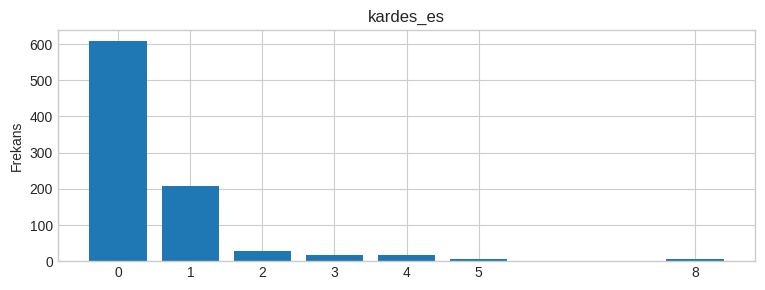

kardes_es: 
 kardes_es
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


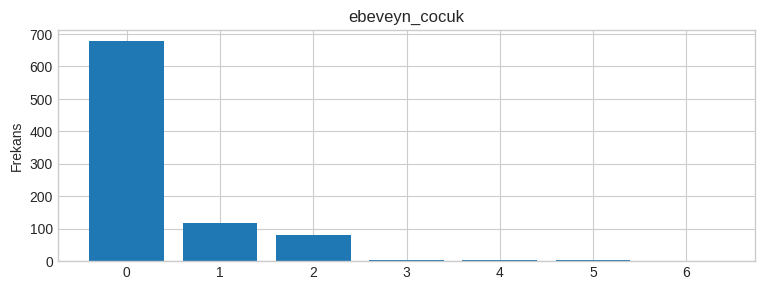

ebeveyn_cocuk: 
 ebeveyn_cocuk
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [ ]:
# buraya kod yazacağız
# fonksiyonumuzu birkaç farklı kategorik değişken için çağıralım
# sonuçları yorumlayalım

kategori1 = ["hayatta_kalma", "cinsiyet", "sinif", "liman", "kardes_es", "ebeveyn_cocuk"]
for c in kategori1:
    cubukGrafigi(c)

In [ ]:
# buraya kod yazacağız
kategori2 = ["kabin", "isim", "bilet"]
for c in kategori2:
    print("{} \n".format(egitim_df[c].value_counts()))

kabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 

isim
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

bilet
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 



<a id = "5"></a><br>
#### Sayısal Değişken

In [ ]:
# buraya kod yazacağız
# sayısal değişkenlere ilişkin histogram çizdirme fonksiyonu
def histogramGrafik(degisken):
    plt.figure(figsize=(9,3))
    plt.hist(egitim_df[degisken], bins=50)
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("{} Histogramı".format(degisken))
    plt.show()

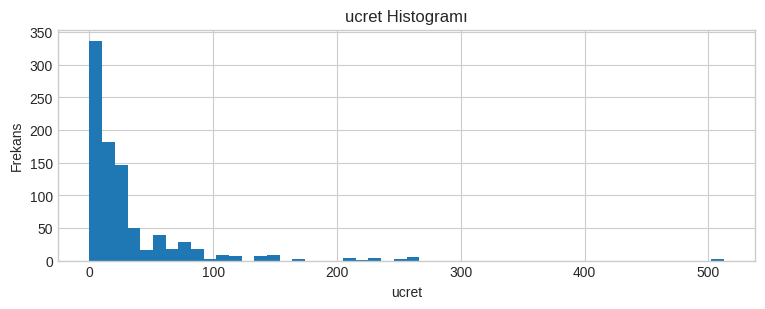

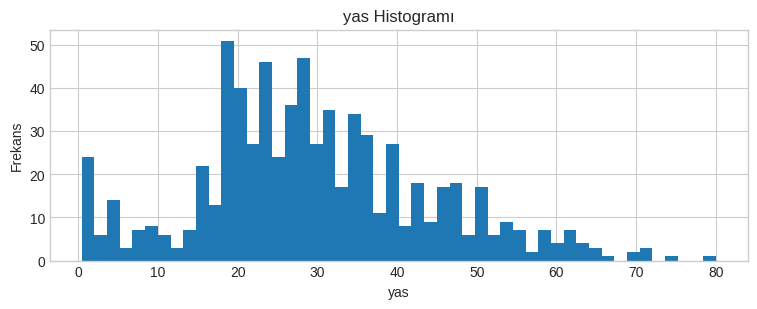

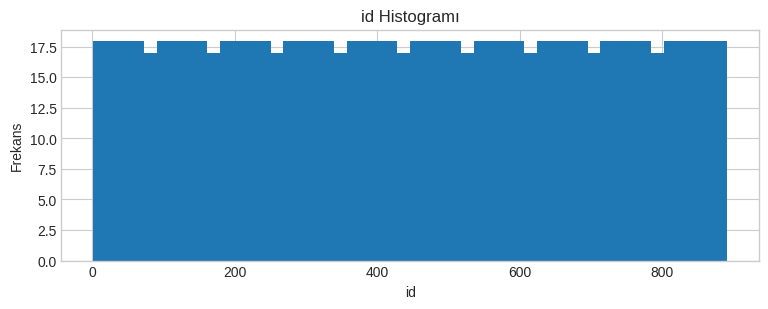

In [ ]:
# buraya kod yazacağız
# sayısal değişkenlerin histogramlarını çizdirerek yorumlayalım
sayisal_degiskenler = ["ucret", "yas", "id"]
for n in sayisal_degiskenler:
    histogramGrafik(n)

<a id = "6"></a><br>
## Temel Veri Analizi
* Bu bölümde hayatta kalma ile farklı değişkenler arasındaki ilişkiyi inceleyelim.
* sinif - hayatta_kalma
* cinsiyet - hayatta_kalma
* kardes_es - hayatta_kalma
* ebeveyn_cocuk - hayatta_kalma
* Uyarı: tabloda çıkan değerler olasılık değildir. Büyüklük olarak karşılaştırılması gerekir.

In [ ]:
# buraya kod yazacağız
# seyahat edilen sınıf - hayatta kalma ilişkisi
egitim_df[["sinif","hayatta_kalma"]].groupby(["sinif"], as_index = False).mean().sort_values(by="hayatta_kalma", ascending = False)

,sinif,hayatta_kalma
0,1,0.629630
1,2,0.472826
2,3,0.242363


* Birinci sınıfta yolculuk eden yolcuların ikinci ve üçüncü sınıfta yolculuk eden yolculara göre hayatta kalmalarının daha yüksek olduğu görülüyor.
* sinif değişkeni hayatta kalma - hayatta kalmama sınıflandırması yaparken kullanabilecemiz önemli bir değişken olabilir.

In [ ]:
# buraya kod yazacağız
# cinsiyet - hayatta kalma ilişkisi
egitim_df[["cinsiyet","hayatta_kalma"]].groupby(["cinsiyet"], as_index = False).mean().sort_values(by="hayatta_kalma", ascending = False)


,cinsiyet,hayatta_kalma
0,female,0.742038
1,male,0.188908


* Kadınların hayatta kalmalarının erkeklere göre çok daha fazla olduğunu görebiliriz.
* cinsiyet değişkeni hayatta kalma - hayatta kalmama sınıflandırması yaparken kullanabilecemiz önemli bir değişken olabilir.

In [ ]:
# buraya kod yazacağız
# kardeş ve eş sayısı ile hayatta kalma ilişkisi
egitim_df[["kardes_es","hayatta_kalma"]].groupby(["kardes_es"],as_index=False).mean().sort_values(by="hayatta_kalma", ascending = False)

,kardes_es,hayatta_kalma
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* kardes ve eş sayısı 1-2-0 olanların 3-4-5-8 olanlara göre hayatta kalmada daha avantajlı oldukları çıkarılabilir.

In [ ]:
# buraya kod yazacağız
# ebeveyn ve çocuk sayısı ile hayatta kalma ilişkisi
egitim_df[["ebeveyn_cocuk", "hayatta_kalma"]].groupby(["ebeveyn_cocuk"], as_index = False).mean().sort_values(by="hayatta_kalma",ascending=False)


,ebeveyn_cocuk,hayatta_kalma
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


* Ebeveyn ve çocuk sayısı 3-1-2-0 olanların 5-4-6 olanlara göre hayatta kalmada daha avantajlı oldukları çıkarılabilir.

<a id = "7"></a><br>
## Aykırı Değer Tespiti
* Aykırı değerler, verinin eğitilmesi sürecinde modelin yanlış öğrenmesine neden olacak değerlerdir. Bu nedenle veriden çıkarılmaları gerekir.

In [ ]:
def aykiriDegerTespiti(df,ozellik):
    outlier_indices = []

    for c in ozellik:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # aykırı değer adımı
        outlier_step = IQR * 1.5
        # aykırı değerleri ve indekslerini tespit et.
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [ ]:
# buraya kod yazacağız
egitim_df.loc[aykiriDegerTespiti(egitim_df,["yas","kardes_es","ebeveyn_cocuk","ucret"])]

,id,hayatta_kalma,sinif,isim,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
# buraya kod yazacağız
egitim_df = egitim_df.drop(aykiriDegerTespiti(egitim_df,["yas","kardes_es","ebeveyn_cocuk","ucret"]), axis = 0).reset_index(drop = True)

<a id = "8"></a><br>
## Kayıp Veri
* Kayıp veri hem eğitim hem de test veri setinde olabilir.
* Kayıp verinin doldurulması işlemini veri setlerini birleştirerek yapmalıyız çünkü kayıp verinin doldurulmasında istatistiksel yöntemleri kullanacağımız için alt kümeler yerine ana kütleyi kullanmak daha uygun olacaktır.
* Bu bölümde aşağıdaki işlemleri gerçekleştireceğiz.
    1. Kayıp Verinin Bulunması
    1. Kayıp Verinin Doldurulması

In [ ]:
# buraya kod yazacağız
# eğitim ve test verisini birleştireceğiz, çünkü kayıp verileri doldururken tüm veri setine ihtiyacımız var
# egitim_df = pd.concat([egitim_df, test_df], axis = 0).reset_index(drop=True)

In [ ]:
# buraya kod yazacağız
egitim_df.head(2)

,id,hayatta_kalma,sinif,isim,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<a id = "9"></a><br>
### Kayıp Verinin Bulunması

In [ ]:
# buraya kod yazacağız
# kayıp veriyi içeren sütunları bulalım
egitim_df.columns[egitim_df.isnull().any()]

Index(['yas', 'kabin', 'liman'], dtype='object')

In [ ]:
# buraya kod yazacağız
egitim_df.isnull().sum()

id                 0
hayatta_kalma      0
sinif              0
isim               0
cinsiyet           0
yas              170
kardes_es          0
ebeveyn_cocuk      0
bilet              0
ucret              0
kabin            680
liman              2
dtype: int64

* hayatta kalma değişkenin boş olması test veri setinden kaynaklı. Çünkü adı üzerinde test veri seti olduğu için test veri setinin içerisinde hayatta_kalma diye bir değişken bulunmuyor. Biz sınıflandırma yaparak test veri setinin içerisindeki örneklerin hayatta kalıp kalamadıklarını bulacağız.
* yas, kabin, liman ve ücret değişkenlerini sırayla ele alalım.               

<a id = "10"></a><br>
### Kayıp Verinin Doldurulması
* liman 2 adet kayıp veriye sahip.

In [ ]:
# buraya kod yazacağız
egitim_df[egitim_df["liman"].isnull()]

,id,hayatta_kalma,sinif,isim,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


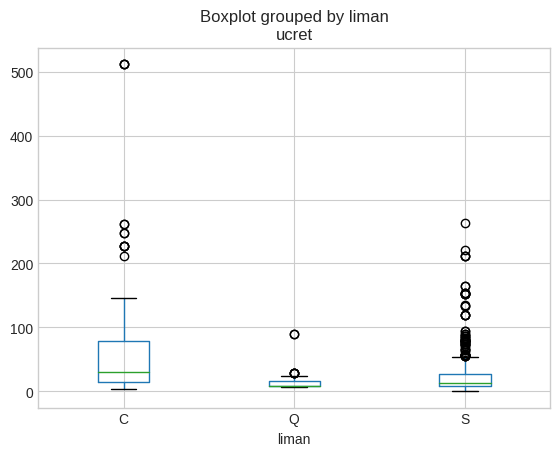

In [ ]:
# buraya kod yazacağız
egitim_df.boxplot(column="ucret",by="liman")
plt.show()

* Liman değişkeni kayıp olan iki örneğin de ödenen ücreti 80.
* limanlara göre ödenen ücretin kutu grafiğine baktığımız zaman, ödenen ücret olan 80'nin Q ve S limanları için aykırı değer olduğu görülüyor.
* Bu nedenle, liman değişkeni kayıp olan iki örneğin liman değerini "C" olarak doldurabiliriz.

In [ ]:
# buraya kod yazacağız
egitim_df["liman"] = egitim_df["liman"].fillna("C") # boş liman verilerini C ile doldur
egitim_df[egitim_df["liman"].isnull()] # tekrardan boş eleman var mı diye kontrol edelim

,id,hayatta_kalma,sinif,isim,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman


In [ ]:
# buraya kod yazacağız
egitim_df[egitim_df["ucret"].isnull()]

,id,hayatta_kalma,sinif,isim,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman


* Yaş değişkeninde bulunan kayıp verileri, veriyi görselleştirme yöntemleri ile derinlemesine inceledikten sonra dolduracağız.
* Kabin değişkenini sınıflandırmada kullanmayacağımız için kabin değişkeninde bulunan kayıp verilerin doldurulmasına gerek yoktur.

<a id = "11"></a><br>
## Görselleştirme
* Bu bölümde farklı görselleştirme teknikleri kullanarak veriyi derinlemesine inceleyeceğiz ve makine öğrenmesi algoritmamız için gerekli olan çıkarımları yapacağız.

<a id = "12"></a><br>
### Kardeş/Eş -- Ebeveyn/Çocuk -- Yaş -- Ücret -- Hayatta Kalma Arasındaki Korelasyon

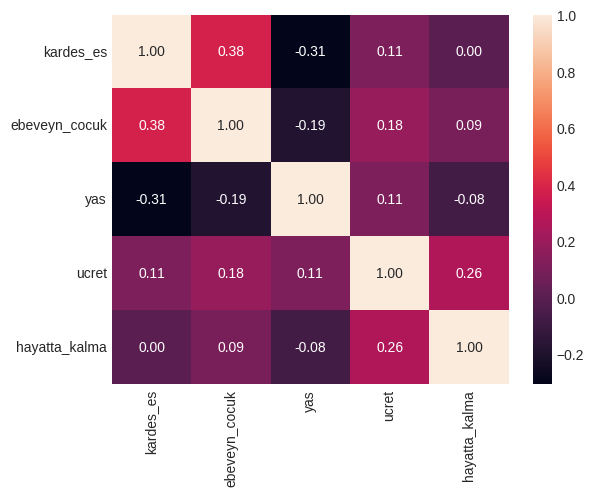

In [ ]:
# buraya kod yazacağız
list1 = ["kardes_es", "ebeveyn_cocuk", "yas", "ucret", "hayatta_kalma"]
sns.heatmap(egitim_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

* Hayatta kalma ile en çok ilişkisi olan 0.26'lık oran ile bilet ücretidir.

<a id = "13"></a><br>
### Kardeş/Eş -- Hayatta Kalma

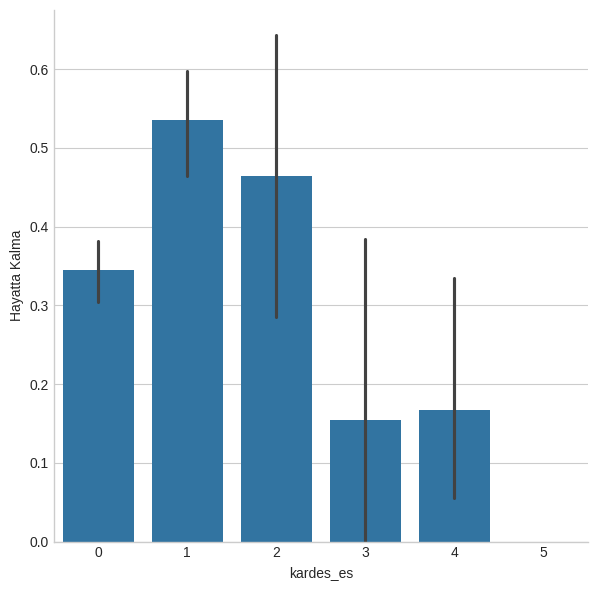

In [ ]:
# buraya kod yazacağız
#g = sns.factorplot(x = "kardes_es", y = "hayatta_kalma", data = egitim_df, kind = "bar", size = 6)
#g.set_ylabels("Hayatta Kalma")
#plt.show()

# buraya kod yazacağız
g = sns.catplot(x="kardes_es", y="hayatta_kalma", data=egitim_df, kind="bar", height=6)
g.set_ylabels("Hayatta Kalma")
plt.show()

* Çok sayıda kardeş ve eşe sahip olan yolcuların hayatta kalmaları daha az.
* 0-1-2 sayıda kardeş ve eşe sahip olan yolcuların hayatta kalmaları daha yüksek.
* Bu nedenle kardes_es değişkeni kullanarak yeni bir özellik çıkarabiliriz.

<a id = "14"></a><br>
### Ebeveyn/Çocuk -- Hayatta Kalma

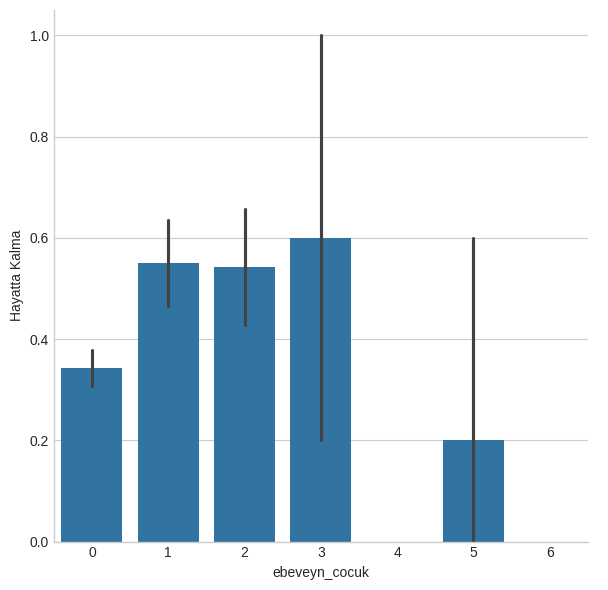

In [ ]:
# buraya kod yazacağız
#g = sns.catplot(x = "ebeveyn_cocuk", y = "hayatta_kalma", kind = "bar", data = egitim_df, size = 6)
#g.set_ylabels("Hayatta Kalma")
#plt.show()

# buraya kod yazacağız
g = sns.catplot(x="ebeveyn_cocuk", y="hayatta_kalma", kind="bar", data=egitim_df, height=6)
g.set_ylabels("Hayatta Kalma")
plt.show()

* 3 ve daha az ebeveyn ve çocuğa sahip yolcuların hayatta kalmaları daha yüksek.
* Kardeş/eş ve ebeveyn/çocuk değişkenlerinden yola çıkarak, bu iki değişken aile değişkeni altında birleştirilip yeni bir özellik çıkarılabilir.

<a id = "15"></a><br>
### Sınıf -- Hayatta Kalma

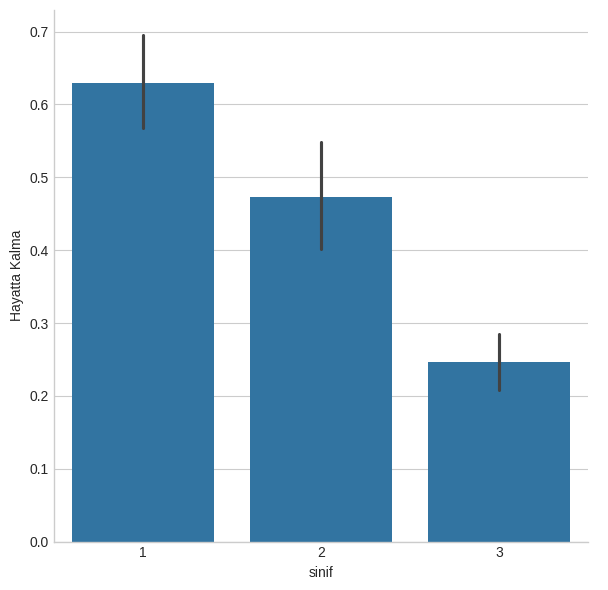

In [ ]:
# buraya kod yazacağız
#g = sns.factorplot(x = "sinif", y = "hayatta_kalma", data = egitim_df, kind = "bar", size = 6)
#g.set_ylabels("Hayatta Kalma")
#plt.show()

# buraya kod yazacağız
g = sns.catplot(x="sinif", y="hayatta_kalma", data=egitim_df, kind="bar", height=6)
g.set_ylabels("Hayatta Kalma")
plt.show()

* Daha önceden de yaptığımız incelemeler doğrultusunda, yolcuların sınıfları ve hayatta kalma arasında ilişki olduğunu görmüştük, burada çubuk grafik ile bu teoriyi güçlendiriyoruz.

<a id = "16"></a><br>
### Yaş -- Hayatta Kalma

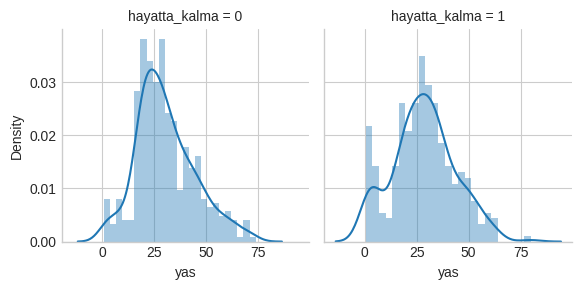

In [ ]:
# buraya kod yazacağız
g = sns.FacetGrid(egitim_df, col = "hayatta_kalma")
g.map(sns.distplot, "yas", bins = 25)
plt.show()

* 10 yaşından küçük yolcuların hayatta kalmaları yüksek
* En yaşlı yolcular (80 yaş) hayatta kaldılar
* 20 yaş civarında ki yolcuların çoğu hayatta kalamadı
* Yolcuların çoğu 15-35 yaş aralığında
* Yaş değişkenini makine öğrenmesi modelimizi eğitirken kullanabiliriz
* Ayrıca yaş dağılımını, yaş değişkeni içerisinde bulunan kayıp verileri doldurmak için kullanacağız.

<a id = "17"></a><br>
### Sınıf -- Hayatta Kalma -- Yaş

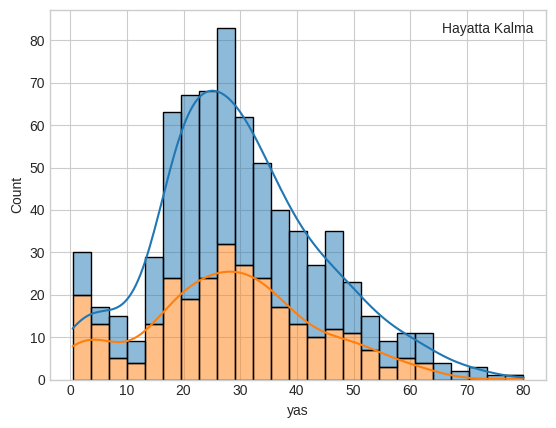

In [ ]:
# buraya kod yazacağız
#g = sns.FacetGrid(egitim_df, col = "hayatta_kalma", row = "sinif", size = 2)
#g.map(plt.hist, "yas", bins = 25)
#g.add_legend()
#plt.show()

# buraya kod yazacağız
g = sns.histplot(data=egitim_df, x="yas", hue="hayatta_kalma", multiple="stack", bins=25, kde=True)
plt.legend(title="Hayatta Kalma")
plt.show()

* Bu grafik sayesinde üçüncü sınıfta bulunan yolcuların genç nüfusun büyük bir kısmını oluşturduğunu anlıyoruz.
* Sınıf farkının hayatta kalmaya etkisini bir kere daha görüyoruz.

<a id = "18"></a><br>
### Liman -- Cinsiyet -- Sınıf -- Hayatta Kalma

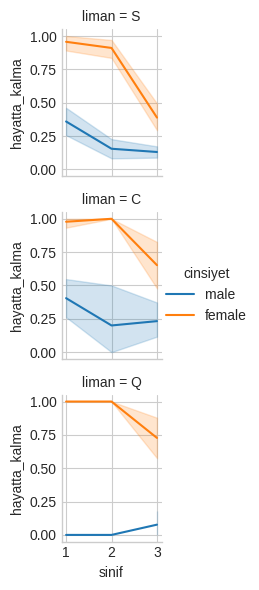

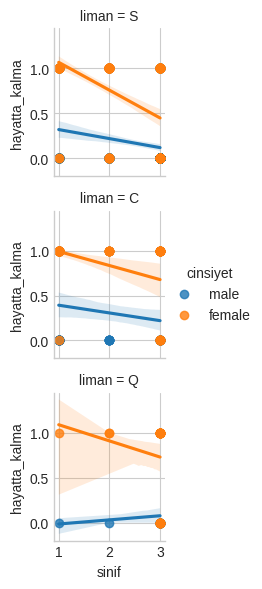

In [ ]:
# buraya kod yazacağız
#g = sns.FacetGrid(egitim_df, row = "liman", size = 2)
#g.map(sns.pointplot, "sinif", "hayatta_kalma", "cinsiyet")
#g.add_legend()
#plt.show()

# buraya kod yazacağız
g = sns.relplot(data=egitim_df, row="liman", x="sinif", y="hayatta_kalma", hue="cinsiyet", kind="line", height=2)
plt.show()

# buraya kod yazacağız
g = sns.lmplot(data=egitim_df, row="liman", x="sinif", y="hayatta_kalma", hue="cinsiyet", height=2)
plt.show()

* Kadın yolcuların hayatta kalmaları erkeklere göre çok daha yüksektir.
* C limanından binen yolcular arasında erkelerin hayatta kalmaları kadınlara göre daha fazladır.
* Cinsiyeti ve limanı makine öğrenmesi modelimizi eğitirken kullanacağız.

<a id = "19"></a><br>
### Liman -- Cinsiyet -- Ücret -- Hayatta Kalma

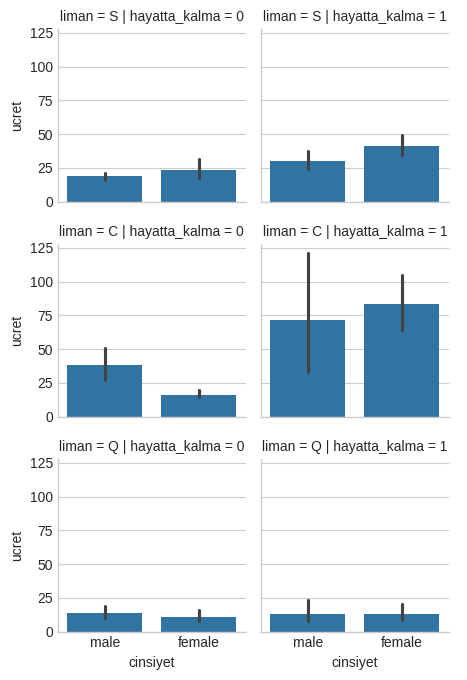

In [ ]:
# buraya kod yazacağız
#g = sns.FacetGrid(egitim_df, row = "liman", col = "hayatta_kalma", size = 2.3)
#g.map(sns.barplot, "cinsiyet", "ucret")
#g.add_legend()
#plt.show()

# buraya kod yazacağız
g = sns.catplot(data=egitim_df, row="liman", col="hayatta_kalma", x="cinsiyet", y="ucret", kind="bar", height=2.3)
plt.show()



* Daha yüksek ücret ödeyen yolcuların hayatta kalması daha fazladır.
* Ücret, eğitim için kategorik bir değişken olarak kullanılabilir.

<a id = "20"></a><br>
### Kayıp Veri Doldurulması: Yaş Değişkeni
* Yaş değişkeninde bulunan kayıp veriyi, yaş değişkeninin dağılımına göre dolduracağız.

In [ ]:
# buraya kod yazacağız
# öncelikle yaş değişkenindeki kayıp veriye bakalım
egitim_df[egitim_df["yas"].isnull()]

,id,hayatta_kalma,sinif,isim,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


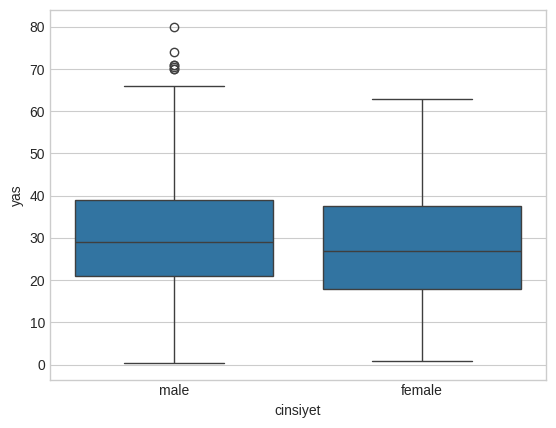

In [ ]:
# buraya kod yazacağız
#sns.factorplot(x = "cinsiyet", y = "yas", data = egitim_df, kind = "box")
#plt.show()

# buraya kod yazacağız
sns.boxplot(x="cinsiyet", y="yas", data=egitim_df)
plt.show()

* Cinsiyet, yaş tahmini için bilgilendirici değil, yaş dağılımı aynı görünüyor.

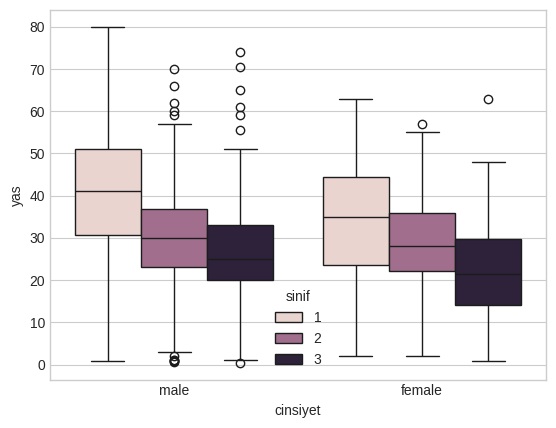

In [ ]:
# buraya kod yazacağız
#sns.factorplot(x = "cinsiyet", y = "yas", hue = "sinif", data = egitim_df, kind = "box")
#plt.show()

# buraya kod yazacağız
sns.boxplot(x="cinsiyet", y="yas", hue="sinif", data=egitim_df)
plt.show()

* 1. sınıf yolcular 2. sınıftan, 2. sınıf yolcular 3. sınıftan yaş olarak büyüktür.

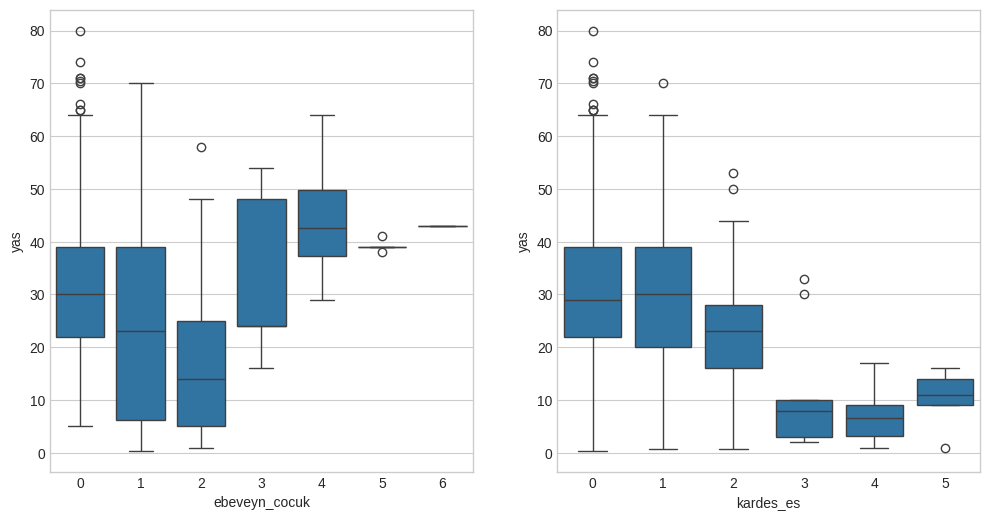

In [ ]:
# buraya kod yazacağız
#sns.factorplot(x = "ebeveyn_cocuk", y = "yas", data = egitim_df, kind = "box")
#sns.factorplot(x = "kardes_es", y = "yas", data = egitim_df, kind = "box")
#plt.show()

# buraya kod yazacağız
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="ebeveyn_cocuk", y="yas", data=egitim_df)

plt.subplot(1, 2, 2)
sns.boxplot(x="kardes_es", y="yas", data=egitim_df)

plt.show()

* Yaş değişkeni, ebeveyn/çocuk ve kardeş/eş değişkenlerine göre farklılık göstermektedir.

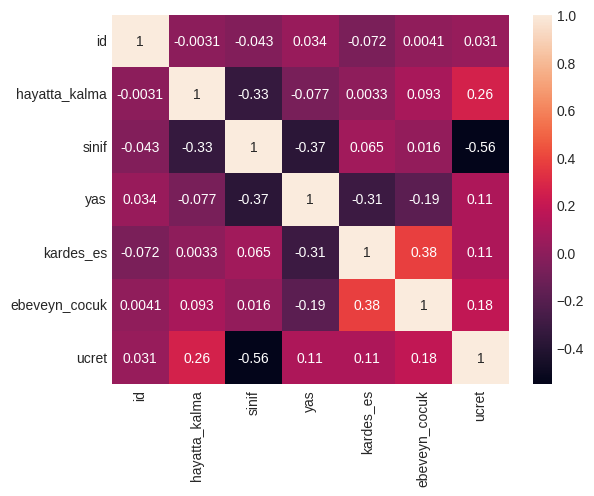

In [ ]:
# buraya kod yazacağız
#sns.heatmap(egitim_df[["yas", "cinsiyet", "kardes_es", "ebeveyn_cocuk", "sinif"]].corr(), annot = True)
#plt.show()

numeric_columns = egitim_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

* Tüm bu analizler göz önünde bulundurulduğunda, yaş cinsiyetle ilişkili değildir, ancak sınıf, ebeveyn/çocuk ve kardeş/eş ile ilişkilidir.
* Bu nedenle bu üç değişkeni göz önünde bulundurarak, yaş için kayıp verileri dolduralım.

In [ ]:
index_nan_age = list(egitim_df["yas"][egitim_df["yas"].isnull()].index)
for i in index_nan_age:
    age_pred = egitim_df["yas"][((egitim_df["kardes_es"] == egitim_df.iloc[i]["kardes_es"]) &(egitim_df["ebeveyn_cocuk"] == egitim_df.iloc[i]["ebeveyn_cocuk"])& (egitim_df["sinif"] == egitim_df.iloc[i]["sinif"]))].median()
    age_med = egitim_df["yas"].median()
    if not np.isnan(age_pred):
        egitim_df["yas"].iloc[i] = age_pred
    else:
        egitim_df["yas"].iloc[i] = age_med

In [ ]:
# buraya kod yazacağız
egitim_df[egitim_df["yas"].isnull()]

,id,hayatta_kalma,sinif,isim,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman


<a id = "21"></a><br>
## Özellik Mühendisliği
* Özellik mühendisliği, veri madenciliği teknikleri yoluyla ham verilerden özellikleri çıkarmak için alan bilgisini kullanma sürecidir.
* Bu özellikler, makine öğrenimi algoritmalarının performansını iyileştirmek için kullanılabilir.
* Özellik mühendisliği, uygulamalı makine öğreniminin kendisi olarak düşünülebilir.

<a id = "22"></a><br>
### İsim -- Ünvan
* Yolcuların hayatta kalıp kalmadığını anlama noktasında, yolcuların isimleri bize yardımcı olmayacaktır ama o zamanın şartlarından kaynaklı olarak yolcuların ünvanları sınıflandırma konusunda kullanabiliriz.

In [ ]:
# buraya kod yazacağız
# ilk 10 örneğin isimlerine bakalım, buradaki unvanları inceleyelim
egitim_df["isim"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: isim, dtype: object

In [ ]:
# buraya kod yazacağız
name = egitim_df["isim"]
egitim_df["unvan"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
egitim_df["unvan"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: unvan, dtype: object

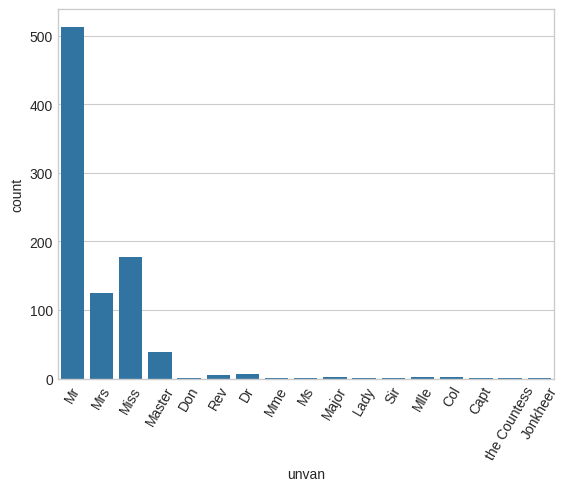

In [ ]:
# buraya kod yazacağız
# tüm unvanları görselleştirelim
sns.countplot(x = "unvan", data = egitim_df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
# ünvanların bazıları çok nadir olduğu için, ünvanların hepsini kategorik hale getirelim
egitim_df["unvan"] = egitim_df["unvan"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
egitim_df["unvan"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in egitim_df["unvan"]]
egitim_df["unvan"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: unvan, dtype: int64

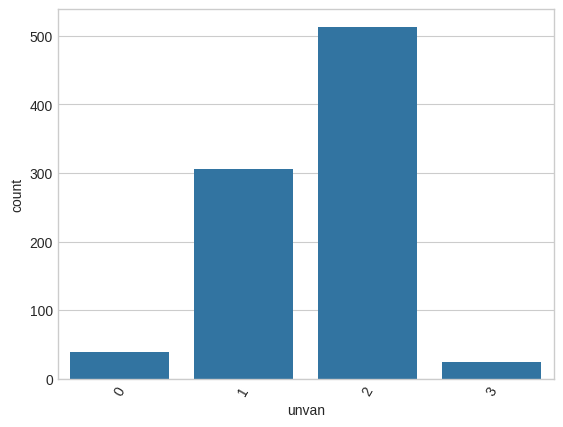

In [ ]:
# buraya kod yazacağız
# kategorik hale getirmiş olduğumuz unvanları görselleştirelim
sns.countplot(x = "unvan", data = egitim_df)
plt.xticks(rotation = 60)
plt.show()

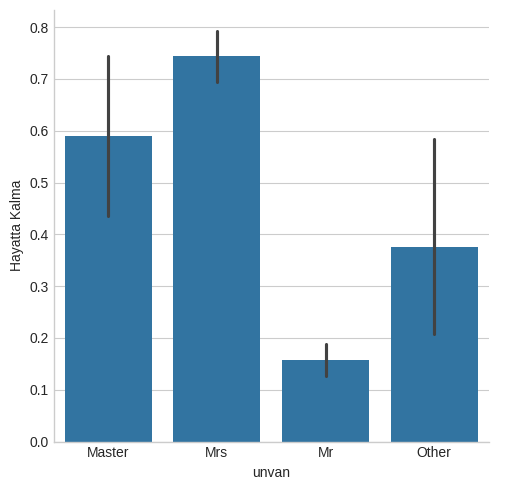

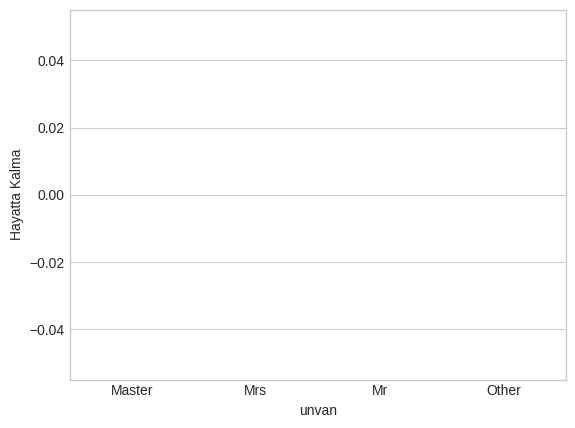

In [ ]:
# buraya kod yazacağız
# unvanlar ve hayatta kalma arasındaki ilişkiye bakalım
#g = sns.factorplot(x = "unvan", y = "hayatta_kalma", data = egitim_df, kind = "bar")
#g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
#g.set_ylabels("Hayatta Kalma")
#plt.show()

# buraya kod yazacağız
g = sns.catplot(x="unvan", y="hayatta_kalma", data=egitim_df, kind="bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Hayatta Kalma")
plt.show()

# buraya kod yazacağız
sns.barplot(x="unvan", y="hayatta_kalma", data=egitim_df, ci=None, order=["Master", "Mrs", "Mr", "Other"])
plt.ylabel("Hayatta Kalma")
plt.show()

In [ ]:
# buraya kod yazacağız
# unvan için yeni bir sütun tanımladığımız için isimleri çıkartabiliriz
egitim_df.drop(labels = ["isim"], axis = 1, inplace = True)
egitim_df.head(3)

,id,hayatta_kalma,sinif,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman,unvan
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [ ]:
# buraya kod yazacağız
# getdummies metodunu, unvan değişkeni içerisinde bulunan kategorik veriyi one-hot şeklinde temsil eder.
egitim_df = pd.get_dummies(egitim_df, columns = ["unvan"])
egitim_df.head(3)

,id,hayatta_kalma,sinif,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman,unvan_0,unvan_1,unvan_2,unvan_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False


<a id = "23"></a><br>
### Aile Boyutu
* Hayatta kalma ile kardes_es ve ebeveyn_cocuk değişkenlerinin ilişkisi olduğunu incelemiştik.
* Bu bölümde kardes_es ve ebeveyn_cocuk değişkenlerini birleştirip tek bir değişken elde edeceğiz.

In [ ]:
# buraya kod yazacağız
egitim_df.head(3)

,id,hayatta_kalma,sinif,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman,unvan_0,unvan_1,unvan_2,unvan_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False


In [ ]:
# buraya kod yazacağız
# yolcunun kendisi + yolcunun kardes_es sayı değeri + yolcunun ebeveyn_cocuk sayısı
egitim_df["aile_boyutu"] = egitim_df["kardes_es"] + egitim_df["ebeveyn_cocuk"] + 1
egitim_df.head(3)

,id,hayatta_kalma,sinif,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman,unvan_0,unvan_1,unvan_2,unvan_3,aile_boyutu
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1


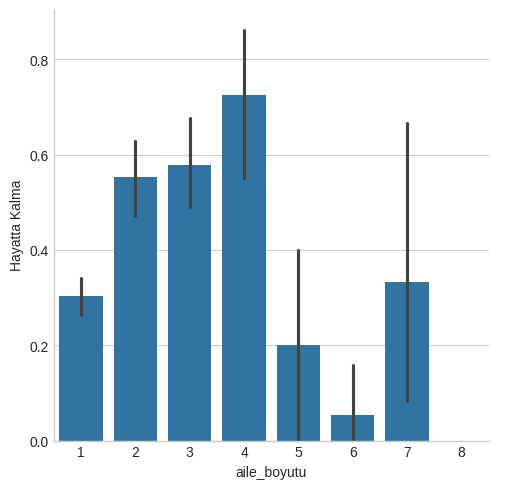

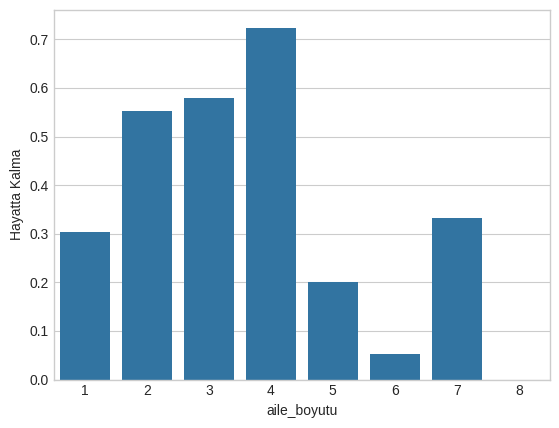

In [ ]:
# buraya kod yazacağız
# aile boyutunu görselleştirelim
#g = sns.factorplot(x = "aile_boyutu", y = "hayatta_kalma", data = egitim_df, kind = "bar")
#g.set_ylabels("Hayatta Kalma")
#plt.show()

# buraya kod yazacağız
g = sns.catplot(x="aile_boyutu", y="hayatta_kalma", data=egitim_df, kind="bar")
g.set_ylabels("Hayatta Kalma")
plt.show()

# buraya kod yazacağız
sns.barplot(x="aile_boyutu", y="hayatta_kalma", data=egitim_df, ci=None)
plt.ylabel("Hayatta Kalma")
plt.show()

In [ ]:
# buraya kod yazacağız
# aile boyutu değişkenini iki kategorili hale getirelim
# eğer aile boyutu < 5 ise 1 değeri verelim; aksi takdirde 0 değeri verelim
egitim_df["aile"] = [1 if i < 5 else 0 for i in egitim_df["aile_boyutu"]]
egitim_df.head(10)

,id,hayatta_kalma,sinif,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman,unvan_0,unvan_1,unvan_2,unvan_3,aile_boyutu,aile
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


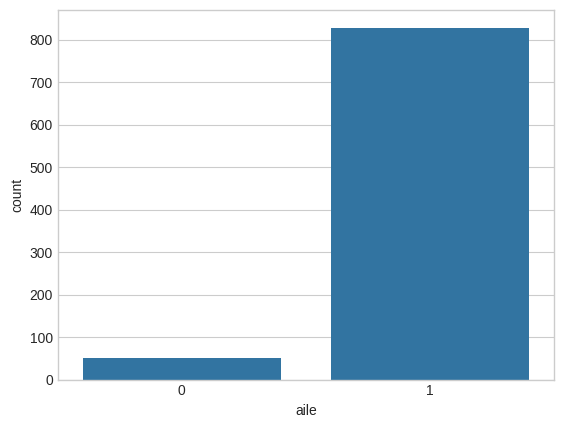

In [ ]:
# buraya kod yazacağız
# aileyi görselleştirelim
sns.countplot(x = "aile", data = egitim_df)
plt.show()

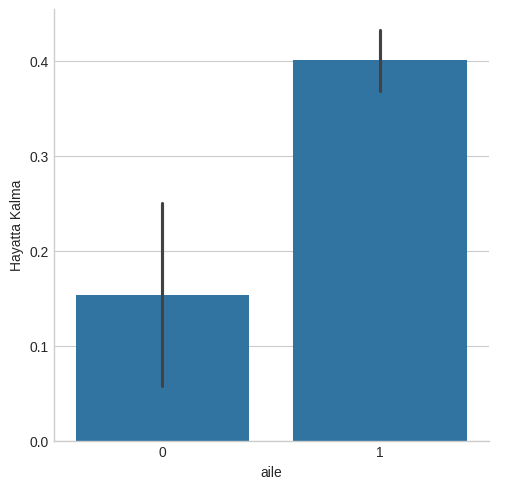

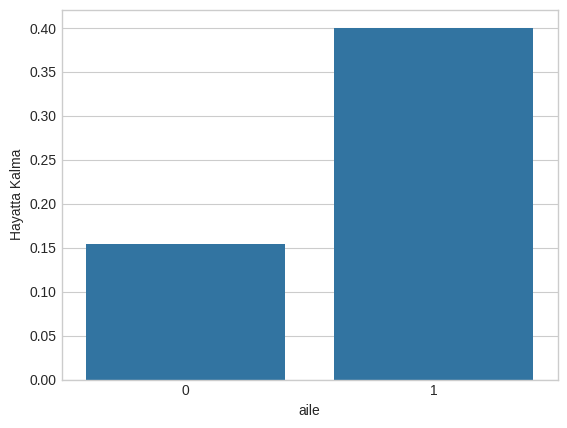

In [ ]:
# buraya kod yazacağız
# aile değişkeni ve hayatta kalma arasındaki ilişkiye bakalım
#g = sns.factorplot(x = "aile", y = "hayatta_kalma", data = egitim_df, kind = "bar")
#g.set_ylabels("Hayatta Kalma")
#plt.show()

# buraya kod yazacağız
g = sns.catplot(x="aile", y="hayatta_kalma", data=egitim_df, kind="bar")
g.set_ylabels("Hayatta Kalma")
plt.show()

# buraya kod yazacağız
sns.barplot(x="aile", y="hayatta_kalma", data=egitim_df, ci=None)
plt.ylabel("Hayatta Kalma")
plt.show()

* Küçük ailelerin hayatta kalma şansı büyük ailelere göre daha fazladır.

In [ ]:
# buraya kod yazacağız
# aile değişkenini de one-hot hale getirelim
egitim_df = pd.get_dummies(egitim_df, columns = ["aile"])
egitim_df.head(3)

,id,hayatta_kalma,sinif,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,liman,unvan_0,unvan_1,unvan_2,unvan_3,aile_boyutu,aile_0,aile_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True


<a id = "24"></a><br>
### Liman

In [ ]:
# buraya kod yazacağız
egitim_df["liman"].head(3)

0    S
1    C
2    S
Name: liman, dtype: object

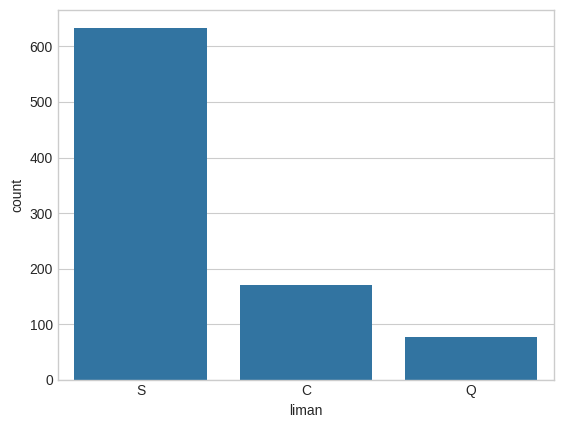

In [ ]:
# buraya kod yazacağız
# limanları görselleştirelim
sns.countplot(x = "liman", data = egitim_df)
plt.show()

In [ ]:
# buraya kod yazacağız
# liman değişkenini de one-hot gösterime dönüştürelim
egitim_df = pd.get_dummies(egitim_df, columns = ["liman"])
egitim_df.head(3)

,id,hayatta_kalma,sinif,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,unvan_0,unvan_1,unvan_2,unvan_3,aile_boyutu,aile_0,aile_1,liman_C,liman_Q,liman_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True


<a id = "25"></a><br>
### Bilet
* Biletlerin başında yazan sayıları önemli örneğin bilet no: A/5 21171, burada A5 bizim için ayırt edici bir veri olacak.
* Bu nedenle bilet değişkeni içerisindeki veriyi düzenleyeceğiz.

In [ ]:
# buraya kod yazacağız
egitim_df["bilet"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: bilet, dtype: object

In [ ]:
# buraya kod yazacağız
# A5 değerini nasıl elde ettiğimize ilişkin bir örnek
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [ ]:
# buraya kod yazacağız
# tüm bilet numaraları için yukarıdakine benzer komutu işletelim
tickets = []
for i in list(egitim_df["bilet"]):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")

egitim_df["bilet"] = tickets

In [ ]:
# buraya kod yazacağız
# biletlerin önemli bölümlerini elde edelim
egitim_df["bilet"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: bilet, dtype: object

In [ ]:
# buraya kod yazacağız
egitim_df.head(3)

,id,hayatta_kalma,sinif,cinsiyet,yas,kardes_es,ebeveyn_cocuk,bilet,ucret,kabin,unvan_0,unvan_1,unvan_2,unvan_3,aile_boyutu,aile_0,aile_1,liman_C,liman_Q,liman_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True


In [ ]:
# buraya kod yazacağız
# bilet değişkenini de one-hot gösterime çevirelim
egitim_df = pd.get_dummies(egitim_df, columns = ["bilet"], prefix = "T")
egitim_df.head(3)

,id,hayatta_kalma,sinif,cinsiyet,yas,kardes_es,ebeveyn_cocuk,ucret,kabin,unvan_0,...,T_STON/O2. 3101290,T_SW/PP 751,T_W./C. 14258,T_W./C. 14263,T_W./C. 6607,T_W./C. 6608,T_W./C. 6609,T_W.E.P. 5734,T_W/C 14208,T_WE/P 5735
0,1,0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,False,False,False,False,False,False


<a id = "26"></a><br>
### Sınıf

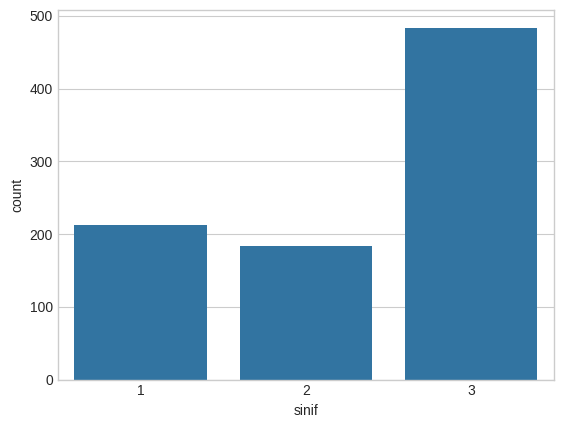

In [ ]:
# buraya kod yazacağız
# sınıfları görselleştirelim
sns.countplot(x = "sinif", data = egitim_df)
plt.show()

In [ ]:
# buraya kod yazacağız
# sınıf değişkenini kategorik hale getirelim ve ardından one-hot gösterime geçirelim
# çünkü get_dummies fonksiyonu sadece kategorik veride çalışır
egitim_df["sinif"] = egitim_df["sinif"].astype("category")
egitim_df = pd.get_dummies(egitim_df, columns = ["sinif"])
egitim_df.head(3)

,id,hayatta_kalma,cinsiyet,yas,kardes_es,ebeveyn_cocuk,ucret,kabin,unvan_0,unvan_1,...,T_W./C. 14263,T_W./C. 6607,T_W./C. 6608,T_W./C. 6609,T_W.E.P. 5734,T_W/C 14208,T_WE/P 5735,sinif_1,sinif_2,sinif_3
0,1,0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,False,True,...,False,False,False,False,False,False,False,False,False,True


<a id = "27"></a><br>
### Cinsiyet

In [ ]:
# buraya kod yazacağız
# cinsiyeti de one-hot gösterime çevirelim
egitim_df["cinsiyet"] = egitim_df["cinsiyet"].astype("category")
egitim_df = pd.get_dummies(egitim_df, columns=["cinsiyet"])
egitim_df.head()

,id,hayatta_kalma,yas,kardes_es,ebeveyn_cocuk,ucret,kabin,unvan_0,unvan_1,unvan_2,...,T_W./C. 6608,T_W./C. 6609,T_W.E.P. 5734,T_W/C 14208,T_WE/P 5735,sinif_1,sinif_2,sinif_3,cinsiyet_female,cinsiyet_male
0,1,0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,26.0,0,0,7.9250,NaN,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,4,1,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,5,0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True


<a id = "28"></a><br>
### Yolcu Numarası ve Kabin Değişkenlerinin Çıkarılması

In [ ]:
# buraya kod yazacağız
# yolcu numarası ve kabin değişkenlerinin sınıflandırma açısından
# bir önemi olmadığını düşündüğümüzden, bunları çıkaralım
egitim_df.drop(labels = ["id", "kabin"], axis = 1, inplace = True)

In [ ]:
# buraya kod yazacağız
# sonuç olarak, modelleme öncesi one-hot gösterime aldığımız
# hem de sınıflandırmada kullanacak olduğumuz değişkenleri görelim
egitim_df.columns

Index(['hayatta_kalma', 'yas', 'kardes_es', 'ebeveyn_cocuk', 'ucret',
       'unvan_0', 'unvan_1', 'unvan_2', 'unvan_3', 'aile_boyutu',
       ...
       'T_W./C. 6608', 'T_W./C. 6609', 'T_W.E.P. 5734', 'T_W/C 14208',
       'T_WE/P 5735', 'sinif_1', 'sinif_2', 'sinif_3', 'cinsiyet_female',
       'cinsiyet_male'],
      dtype='object', length=700)

<a id = "29"></a><br>
## Modelleme
* Bu bölümde verinin eğitim-test olarak bölünmesi, lojistik regresyon ile eğitilmesi, hiperparametre ayarlaması, ızgara arama, çapraz doğrulama ve topluluk modellemesi işlemlerini gerçekleştireceğiz.

<a id = "30"></a><br>
### Eğitim - Test Bölünmesi
* Eğitim %67, test %33 olacak şekilde bölünme işlemini gerçekleştirelim.

In [ ]:
# buraya kod yazacağız
X_egitim = egitim_df.drop(labels = "hayatta_kalma", axis = 1)
y_egitim = egitim_df["hayatta_kalma"]
X_egitim, X_test, y_egitim, y_test = train_test_split(X_egitim, y_egitim, test_size = 0.33, random_state = 42)
print("X eğitim: ", len(X_egitim))
print("X test: ", len(X_test))
print("Y eğitim: ", len(y_egitim))
print("Y test: ", len(y_test))

X eğitim:  590
X test:  291
Y eğitim:  590
Y test:  291


<a id = "31"></a><br>
### Temel Lojistik Regresyon

In [ ]:
# buraya kod yazacağız
logreg = LogisticRegression()
logreg.fit(X_egitim, y_egitim)
basarim_log_egitim = round(logreg.score(X_egitim, y_egitim)*100, 2)
basarim_log_test = round(logreg.score(X_test, y_test)*100,2)
print("Eğitim Doğruluğu: % {}".format(basarim_log_egitim))
print("Test Doğruluğu: % {}".format(basarim_log_test))

Eğitim Doğruluğu: % 86.27
Test Doğruluğu: % 83.16


<a id = "32"></a><br>
### Hiperparametre Ayarı - Izgara Arama - Çapraz Doğrulama
* Bu bölümde 5 farklı makine öğrenmesi sınıflandırıcısını karşılaştıracağız ve katmanlı çapraz doğrulama ile her birinin ortalama doğruluğunu değerlendireceğiz.
1. Karar Ağacı
1. Destek Vektör Makinesi
1. Rastgele Orman
1. K-En Yakın Komşu
1. Lojistik Regresyon

In [ ]:
# buraya kod yazacağız
random_state = 42
# tüm sınıflandırıcıları bir listede toplayalım
siniflandiricilar = [DecisionTreeClassifier(random_state = random_state),
                     SVC(random_state = random_state),
                     RandomForestClassifier(random_state = random_state),
                     LogisticRegression(random_state = random_state),
                     KNeighborsClassifier()]

# Karar Ağacı Algoritması Hiperparametreleri
dt_param_grid = {"min_samples_split" : range(10,500,20),
                 "max_depth" : range(1,20,2)}

# Destek Vektör Makinesi Algoritması Hiperparametreleri
svc_param_grid = {"kernel" : ["rbf"],
                  "gamma" : [0.001, 0.01, 0.1, 1],
                  "C": [1,10,50,100,200,300,1000]}

# Rastgele Orman Algoritması Hiperparametreleri
rf_param_grid = {"max_features" : [1,3,10],
                 "min_samples_split" : [2,3,10],
                 "min_samples_leaf" : [1,3,10],
                 "bootstrap" : [False],
                 "n_estimators" : [100, 300],
                 "criterion" : ["gini"]}

# Lojistik Regresyon Algoritması Hiperparametreleri
logreg_param_grid = {"C" : np.logspace(-3,3,7),
                     "penalty" : ["l1", "l2"]}

# K-En Yakın Komşu Algoritması Hiperparametreleri
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype=int).tolist(),
                  "weights" : ["uniform", "distance"],
                  "metric" : ["euclidean", "manhattan"]}

siniflandirici_parametreleri = [dt_param_grid,
                               svc_param_grid,
                               rf_param_grid,
                               logreg_param_grid,
                               knn_param_grid]

In [ ]:
# buraya kod yazacağız
cv_sonuc = []
en_iyi_model = []
siniflandirici_isim = ["Karar Ağacı", "Destek Vektör Makinesi", "Rastgele Orman", "Lojistik Regresyon", "K-En Yakın Komşu"]
for i in range(len(siniflandiricilar)):
    clf = GridSearchCV(siniflandiricilar[i], param_grid = siniflandirici_parametreleri[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1, verbose = 1)
    clf.fit(X_egitim, y_egitim)
    cv_sonuc.append(clf.best_score_)
    en_iyi_model.append(clf.best_estimator_)
    print("Sınıflandırıcı: {}, doğruluk: {}".format(siniflandirici_isim[i], cv_sonuc[i]))


Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Sınıflandırıcı: Karar Ağacı, doğruluk: 0.8338983050847458
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Sınıflandırıcı: Destek Vektör Makinesi, doğruluk: 0.8
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Sınıflandırıcı: Rastgele Orman, doğruluk: 0.8491525423728813
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Sınıflandırıcı: Lojistik Regresyon, doğruluk: 0.8169491525423729
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Sınıflandırıcı: K-En Yakın Komşu, doğruluk: 0.7881355932203389


   CaprazDogrulamaOrtalamasi                Modeller
0                   0.833898             Karar Ağacı
1                   0.800000  Destek Vektör Makinesi
2                   0.849153          Rastgele Orman
3                   0.816949      Lojistik Regresyon
4                   0.788136        K-En Yakın Komşu


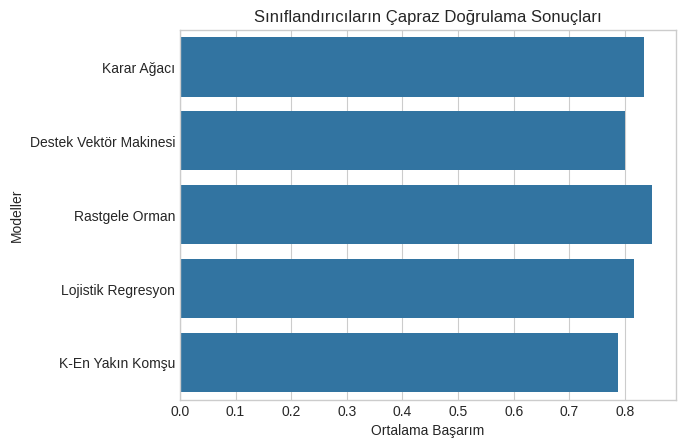

In [ ]:
# buraya kod yazacağız
cv_sonuclar = pd.DataFrame({"CaprazDogrulamaOrtalamasi": cv_sonuc, "Modeller": siniflandirici_isim})
print(cv_sonuclar)
#g = sns.barplot("CaprazDogrulamaOrtalamasi", "Modeller", data = cv_sonuclar)
#g.set_xlabel("Ortalama Başarım")
#g.set_title("Çapraz Doğrulama")
#plt.show()

g = sns.barplot(x="CaprazDogrulamaOrtalamasi", y="Modeller", data=cv_sonuclar)
g.set_xlabel("Ortalama Başarım")
g.set_ylabel("Modeller")
g.set_title("Sınıflandırıcıların Çapraz Doğrulama Sonuçları")
plt.show()

<a id = "33"></a><br>
### Topluluk Modelleme
* Sınıflandırıcıların verdikleri kararlar çoğunluk oylaması şeklinde değerlendirilir.

In [ ]:
# buraya kod yazacağız
oylama = VotingClassifier(estimators=[
    ("dt", siniflandiricilar[0]),
    ("rf", siniflandiricilar[1]),
    ("knn", siniflandiricilar[2]),
    ("lr", siniflandiricilar[3])
], voting="hard", n_jobs=-1)
oylama = oylama.fit(X_egitim, y_egitim)
print("Oylama Sonucu Doğruluk: ", accuracy_score(oylama.predict(X_test),y_test))


Oylama Sonucu Doğruluk:  0.8281786941580757
